In [1]:
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
#import matplotlib.patches as mpatches
from matplotlib.colors import colorConverter as cc
import csv
import numpy as np
pylab.rcParams['figure.figsize'] = (13, 8)

Populating the interactive namespace from numpy and matplotlib


In [2]:
dat1=np.genfromtxt('Cs_EA_CSV.csv',delimiter=',')
x1=dat1[:,0]
y1=dat1[:,1]
erry=dat1[:,2]

print (x1)
xarray=np.arange(x1[0],x1[len(x1)-1],0.0000001)
print (len(xarray))

ValueError: Some errors were detected !
    Line #2 (got 4 columns instead of 1)
    Line #3 (got 4 columns instead of 1)
    Line #4 (got 4 columns instead of 1)
    Line #5 (got 4 columns instead of 1)
    Line #6 (got 4 columns instead of 1)
    Line #7 (got 4 columns instead of 1)
    Line #8 (got 4 columns instead of 1)
    Line #9 (got 4 columns instead of 1)
    Line #10 (got 4 columns instead of 1)
    Line #11 (got 4 columns instead of 1)
    Line #12 (got 4 columns instead of 1)
    Line #13 (got 4 columns instead of 1)
    Line #14 (got 4 columns instead of 1)
    Line #15 (got 4 columns instead of 1)

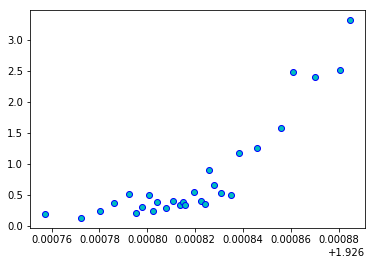

In [18]:
fig = plt.figure()
l = plt.plot(x1, y1, 'bo')
plt.setp(l, markersize=6)
plt.setp(l, markerfacecolor='C')
plt.show()

In [19]:
from scipy.optimize import curve_fit

def Wigner(x,a,b,ea):
    return a + b*np.sqrt(x-ea+np.abs(x-ea))

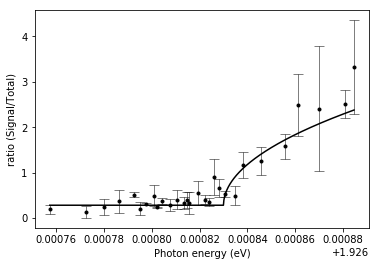

('black', 'Wigner fitted curve: ', array([  0.28391852, 200.49214428,   1.92683003]), 'with error: ', array([1.33549244e-02, 1.99339669e+01, 4.30054869e-07]))


In [22]:
a=0.35
b=35
ea=1.92683
setColor1='black'
setColor2=[1,0,0]
bound_par = ([a-0.5,b-200,ea-0.001],[a+0.5,b+200,ea+0.001])
pl0, covl0 = curve_fit(Wigner, x1, y1,[a,b,ea],bounds=bound_par, sigma=erry, absolute_sigma=True)
#pl2, covl2 = curve_fit(Wigner, x1, y1,[a,b,ea],bounds=bound_par)
plt.errorbar(x1, y1, yerr=erry, fmt='.k',color='blue', capthick=0.5,capsize=5,elinewidth=0.5)
plt.plot(xarray,Wigner(xarray, *pl0),label='fit',color=setColor1)
#plt.plot(xarray,Wigner(xarray, *pl2),label='fit',color=setColor2)
plt.xlabel("Photon energy (eV)")
plt.ylabel("ratio (Signal/Total)")
show()
print(setColor1,'Wigner fitted curve: ' ,pl0, "with error: ",np.sqrt(np.diag(covl0)))

(27, 27, 27)


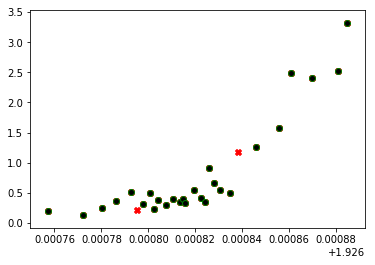

In [23]:
#taking away outliers
x2=numpy.delete(x1,[5,22])
y2=numpy.delete(y1,[5,22])
erry2=numpy.delete(erry,[5,22])

print (len(x2),len(y2),len(erry2))

l1=plt.plot(x2,y2,'go')
l2=plt.scatter(x1,y1,color='red',marker='X')
plt.setp(l1, markersize=6)
plt.setp(l1, markerfacecolor='black')
plt.show()

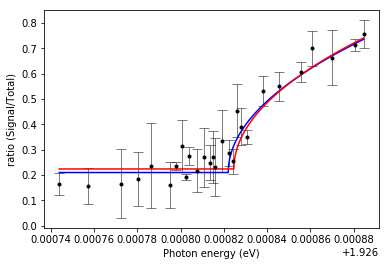

('blue', 'with error: ', array([ 0.21005437, 46.91419072,  1.92682204]))
[8.37765001e-03 1.92449675e+00 8.10037700e-07]


In [14]:
a=0.15
b=35
ea=1.92683
setColor1='blue'
setColor2='red'
bound_par = ([a-0.1,b-20,ea-0.00010],[a+0.1,b+20,ea+0.00010])
pl, covl = curve_fit(Wigner, x2, y2,[a,b,ea],bounds=bound_par, sigma=erry2, absolute_sigma=True)
#pl2, covl2 = curve_fit(Wigner, x2, y2,[a,b,ea],bounds=bound_par)
plt.errorbar(x2, y2, yerr=erry2, fmt='.k',color='blue', capthick=0.5,capsize=5,elinewidth=0.5)
plt.plot(xarray,Wigner(xarray, *pl),label='fit',color=setColor1)
plt.plot(xarray,Wigner(xarray, *pl0),label='fit',color=setColor2)
#plt.plot(xarray,Wigner(xarray, *pl2),label='fit',color=setColor2)
plt.xlabel("Photon energy (eV)")
plt.ylabel("ratio (Signal/Total)")
show()
print(setColor1, "with error: ",pl)
print(np.sqrt(np.diag(covl)))

In [20]:
s0[2]

1.816038826001447e-06